# Analítica y Ciencia de Datos

## CIDE - Otoño 2015

### Introducción a Pandas

# Pandas

* Como lo describen sus creadores [acá](http://pandas.pydata.org/) (ver también [acá](http://pandas.pydata.org/pandas-docs/stable/pandas.pdf), en particular el capítulo 6):

> *... es una librería que provee a Python de estructuras de datos y herramientas de análisis de alto rendimiento*.

* Nosotros la vamos a utilizar principalmente para organizar y trabajar con datos organizados de manera tabular (en tablas).

* Como mínimo debería servir para sustituir completamente Excel...

* ... Pero sirve para potenciar el análisis de datos y la creación de algoritmos y funciones.

# Qué permite hacer Pandas

*  Los capítulos 6 y 7 de este [documento](http://pandas.pydata.org/pandas-docs/stable/pandas.pdf) describen en su totalidad las capacidades reales de Pandas.

* Nosotros vamos a concentrarnos en:

    1. Input/Output de archivos (lectura y escritura):
    2. Qué son los `DataFrames` y las `Series`.
    3. Cómo manejar "datos faltantes", *missing values* o *NaNs*.
    4. Cómo hacer `groupby` y tablas dinámicas como en Excel.
    5. Ejemplos de gráficos en Pandas.
    6. Cómo hacer un `merge`.


* Por el tiempo no podremos hacer uso de las capacidades para manejar series de tiempo, por ejemplo.

    * Para análisis de datos en general, y un uso más avanzado de Pandas, pueden leer [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do), escrito por el creador de Pandas.

In [1]:
# Importemos las librerías que necesitamos 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# 1. Lectura de datos

* Python cuenta con varias librerías y [funciones](http://www.tutorialspoint.com/python/python_files_io.htm) para importar datos.

* Numpy también las [tiene](http://docs.scipy.org/doc/numpy/reference/routines.io.html).

* Por ahora vamos a concentrarnos en las funciones de [Pandas](http://pandas.pydata.org/pandas-docs/stable/io.html).

    * [`read_csv()`](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table) permite leer tablas cuyos valores están separados por comas (comma-separated-values), y en general cualquier archivo *plano* que utilice algún *delimiter* para separar columnas.
    
    * [`read_excel()`](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel) permite importar datos de archivos de Excel.
    
    * Pero hay otras funciones que pueden ser más apropiadas en otros casos (por ejemplo, ¿quiere importar datos de [Stata](http://pandas.pydata.org/pandas-docs/stable/io.html#io-stata-reader), trabajar con ellos o simplemente convertirlos a Excel?)

In [3]:
# importemos nuestros datos:
# Si es un archivo de excel tenemos que incluir el nombre de la hoja que queremos abrir
data = pd.read_excel('data_cnbv.xlsx','data')
# miremos que los datos fueron correctamente importados
data.head(5)

,cve_municipio,cve_institucion,cve_calculado,201412,201501,201502,201503,201504,201505,201506,201507
0,1001,040002,4001479,68,68,68,68,68,68,69,70
1,NaN,NaN,4001480,175340,175300,168377,168344,170511,170554,170620,170723
2,NaN,NaN,4001481,111773,112288,112701,113333,113703,114185,114718,95107
3,NaN,NaN,4001482,148,150,150,149,150,149,150,151
4,NaN,NaN,4001484,13,13,13,13,13,13,13,13


# Exploremos un *DataFrame* de pandas

* Cuando importamos en Pandas, el output es un objeto tabular denominado un *DataFrame*.

![caption](figures/dataframe.png)

# Estructura de un DataFrame

* Un *DataFrame* incluye
    
    * **Index**: son los números que aparecen a la izquierda, denotando las filas del DataFrame.
    
    * **Columns**: las columnas.
        
        * Cuando importamos los datos, por default utiliza la primera fila como header o nombres de las columnas.  Pero podemos decirle a Pandas que no lo haga (ver los argumentos opcionales de la función).
        
    * **data**: los datos que importamos.
    
* Los *DataFrames* son un objeto, una estructura especial de Pandas, y por supuesto heredan ciertas funciones o métodos que vamos a utilizar.

* Cada columna es una `Serie`, otro objeto de Pandas, así que los DF agrupan Series.

# Los datos que estamos utilizando.

* Los datos fueron obtenidos de la [Comisión Nacional Bancaria y de Valores](http://portafolioinfdoctos.cnbv.gob.mx/Documentacion/minfo/040_4a_R3_2015.xls)

* Incluyen la información de varios indicadores (ver hoja *cve_calculado*), para todos los municipios (cve_municipio) y para todos las instituciones de banca múltiple (ver hoja *cve_institucion*).

* Las primeras tres columnas contienen estos indicadores, y las siguientes la información mensual de 2015, incluido diciembre de 2014.

* Los NaNs o *missing values* corresponden a las correspondientes etiquetas (municipio o institución) que aparecieron por última vez y es lo primero que tenemos que arreglar u organizar para poder trabajar con estos datos.

    * En Excel tendrían que hacerlo a mano, o programar una macro en VBA.

In [4]:
# Veamos algunas funciones rápidas de los Data Frames.
# Para ver los primeros K registros
data.head(5)

,cve_municipio,cve_institucion,cve_calculado,201412,201501,201502,201503,201504,201505,201506,201507
0,1001,040002,4001479,68,68,68,68,68,68,69,70
1,NaN,NaN,4001480,175340,175300,168377,168344,170511,170554,170620,170723
2,NaN,NaN,4001481,111773,112288,112701,113333,113703,114185,114718,95107
3,NaN,NaN,4001482,148,150,150,149,150,149,150,151
4,NaN,NaN,4001484,13,13,13,13,13,13,13,13


In [119]:
# para ver los últimos M registros
data.tail(3)

,cve_municipio,cve_institucion,cve_calculado,201412,201501,201502,201503,201504,201505,201506,201507
65526,NaN,NaN,4001531,19,12,72,85,167,127,177,130
65527,NaN,NaN,4001532,304,325,356,374,403,418,440,440
65528,NaN,NaN,4001534,303,275,306,324,353,368,390,418


In [138]:
# cuál es el tamaño:
print data.shape
print "-------------------"
# cuáles son los nombres de las columnas
print data.keys()
print "-------------------"
# Cuántos NaNs tenemos por columna:
print data.isnull().sum()
print "-------------------"
# Descriptivos:
print data.describe()
print "-------------------"
# Cuántos municipios incluimos
print data.cve_municipio.unique().shape
print "-------------------"
# veamos los primeros cinco:
print "Primeros cinco municipios"
print pd.Series(data.cve_municipio.unique()).head()
# veamos los primeros cinco:
print "Primeros cinco municipios: excluyendo NaNs"
print pd.Series(data.cve_municipio.unique()).dropna().head()
print "-------------------"
# Cuántas instituciones incluimos
print "Total Instituciones únicas"
print data.cve_institucion.unique().shape
print "Total Instituciones únicas: sin NaNs"
print pd.Series(data.cve_institucion.unique()).dropna().shape


(65529, 11)
-------------------
Index([  u'cve_municipio', u'cve_institucion',   u'cve_calculado',
                   201412,             201501,             201502,
                   201503,             201504,             201505,
                   201506,             201507],
      dtype='object')
-------------------
cve_municipio      65007
cve_institucion    51968
cve_calculado       6780
201412              2538
201501              2529
201502              2510
201503              3455
201504              3471
201505              3433
201506              3357
201507              2466
dtype: int64
-------------------
       cve_municipio   cve_calculado           201412           201501  \
count     522.000000    58749.000000     62991.000000     63000.000000   
mean     8998.990421  4001518.045362     32699.585052     30578.722571   
std      3035.767627       24.511271    394407.702583    328303.438953   
min      1001.000000  4001479.000000         0.000000         0.000000   

# Slicing/Indexing con DataFrames

* La documentación completa se encuentra [acá](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

* Veamos varios ejemplos:

    1. Selección de toda una columna: si la columna se llama `mi_columna` y el dataframe `df`:
    
        > `nueva_columna = df.mi_columna.copy()`
        
    2. Selección de varias columnas: 
    
        > `df[[col1, col2, col3]]`

    3. Selección con booleanos: `.loc(bool)`
    
        > ```
            hombre = (gender == 'H')
            df.loc(hombre)
          ```

    4. Selección por índices: `.iloc()`. Usa las mismas reglas que en Numpy con arrays
    
        > `df.iloc[3,4]`

    5. Selección por índices: `.ix()`
    
        > `df.ix[6:8]`


# Quitemos las filas que tienen Totales

* Para esto vamos a utilizar una función que sirve únicamente para `Strings`.

* [Acá](http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods) pueden encontrar un listado de las funciones vectorizadas para textos o strings.

* Son bastante útiles así que es bueno que se familiaricen con éstas.

* Para los interesados, todas las funciones de texto, en cualquier lenguaje de programación o software, operan utilizando [expresiones regulares, *regular expressiones* o `regex`](http://www.diveintopython3.net/regular-expressions.html).

In [5]:
# Primero: encontremos las filas donde esto pasa: las siguientes variables son booleanos
total_mpio = data.cve_municipio.astype('str').str.contains('Total')
total_inst = data.cve_institucion.str.contains('Total')
print total_mpio.sum(), total_inst.sum(), total_mpio.dtype
# probemos
data.cve_institucion.loc[total_inst==True].head()
# Listo, eliminémoslas: función .drop()
print data.shape
data.drop(data.cve_institucion.loc[total_inst==True].index, inplace=True)
print data.shape
# miremos que quedó bien
print data.cve_institucion.str.contains('Total').sum(), data.shape

0 6780 bool
(65529, 11)
(58749, 11)
0 (58749, 11)


In [6]:
# veamos los primeros 10:
data.head(10)
# set_index() para que los índices vayan de 0:n-1 nuevamente
data.set_index(np.arange(data.shape[0]), inplace=True)
data.head(10)

,cve_municipio,cve_institucion,cve_calculado,201412,201501,201502,201503,201504,201505,201506,201507
0,1001,040002,4001479,68,68,68,68,68,68,69,70
1,NaN,NaN,4001480,175340,175300,168377,168344,170511,170554,170620,170723
2,NaN,NaN,4001481,111773,112288,112701,113333,113703,114185,114718,95107
3,NaN,NaN,4001482,148,150,150,149,150,149,150,151
4,NaN,NaN,4001484,13,13,13,13,13,13,13,13
5,NaN,NaN,4001528,373510,331970,303318,323662,340293,362727,334275,352296
6,NaN,NaN,4001529,1190,1185,1186,1202,1208,1234,1229,1223
7,NaN,NaN,4001530,906,910,904,919,913,932,929,927
8,NaN,NaN,4001531,285333,242133,216666,238898,230934,245633,250148,272289
9,NaN,NaN,4001532,24476,25564,26651,27814,28851,29685,30284,30284


In [7]:
# cuáles son los índices donde no tenemos NaNs?
# Vamos a usar dos pasos:
# primer paso: buscar con un booleano las filas donde no hay NaNs, y restingir el dataframe sólo a esos
# segundo paso: método .index
ind_notnan = data[data.cve_municipio.isnull()==False].index
mun_notnan = data[data.cve_municipio.isnull()==False].cve_municipio.values
#print ind_notnan
# concatenémoslos
mat_mun = np.concatenate((mun_notnan.reshape((mun_notnan.shape[0],1)),
                          ind_notnan.reshape((mun_notnan.shape[0],1))
                          ),axis=1)

AttributeError: 'Int64Index' object has no attribute 'reshape'

In [8]:
# Tenemos que convertirlo a array primero, porque el método Reshape funciona sobre arrays únicamente
mat_mun = np.concatenate((mun_notnan.reshape((mun_notnan.shape[0],1)),
                          np.asarray(ind_notnan).reshape((mun_notnan.shape[0],1))
                          ),axis=1)
# veámoslo
mat_mun

array([[  1001.,      0.],
       [  1002.,    393.],
       [  1003.,    478.],
       ..., 
       [ 13073.,  58527.],
       [ 13074.,  58608.],
       [ 13075.,  58743.]])

In [9]:
# convirtámoslo en un DataFrame:
# Permite visualizar mejor la matriz.  
# ---> Además aprendemos a generar DataFrames
mat_mun = pd.DataFrame(mat_mun, columns=['Municipio','Indice'])
mat_mun.head()

,Municipio,Indice
0,1001,0
1,1002,393
2,1003,478
3,1004,633
4,1005,715


In [10]:
# primer intento: creemos una nueva columna de NaNs
data['primer_intento'] = np.nan
# La idea es la siguiente: vamos a hacer un loop sobre todos los  municipios y llenar los espacios entre los índices
# con ese municipio
# NOTA: VAMOS A PROBAR CON UN SOLO MUNICIPIO PRIMERO
for m in mat_mun.Municipio.values[:1]:
    # seleccionemos el índice del municipio
    ind_mun = mat_mun.loc[mat_mun.Municipio==m].Indice.values[0]
    # seleccionemos el índice del SIGUIENTE municipio
    # primero, el indice dentro de mat_mun
    preind  = mat_mun.loc[mat_mun.Municipio==m].index[0]
    # ya podemos mirar en el siguiente índice: preind+1
    ind_sig = mat_mun.Indice.ix[int(preind + 1)]
    # veamos que hicimos la selección de manera correcta
    print m, ind_mun, preind, ind_sig
    # Ya tenemos los índices: estamos listos para llenar los índices entre [ind_mun,ind_sig) con m
    data.primer_intento.ix[int(ind_mun):(int(ind_sig)-1)] = m

data[['cve_municipio','primer_intento']].head()

# cuál es el valor de primer_intento en el índice 393?
data[['cve_municipio','primer_intento']].ix[390:394]

1001.0 0.0 0 393.0


/Users/danielvaughan/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,cve_municipio,primer_intento
390,NaN,1001
391,NaN,1001
392,NaN,1001
393,1002,NaN
394,NaN,NaN


In [11]:
# funcionó, así que repitamos con todos:
# primer intento: creemos una nueva columna de NaNs
data['primer_intento'] = np.nan
# La idea es la siguiente: vamos a hacer un loop sobre todos los  municipios y llenar los espacios entre los índices
# con ese municipio
# NOTA: VAMOS A PROBAR CON UN SOLO MUNICIPIO PRIMERO
for m in mat_mun.Municipio.values:
    # seleccionemos el índice del municipio
    ind_mun = mat_mun.loc[mat_mun.Municipio==m].Indice.values[0]
    # seleccionemos el índice del SIGUIENTE municipio
    # primero, el indice dentro de mat_mun
    preind  = mat_mun.loc[mat_mun.Municipio==m].index[0]
    # ya podemos mirar en el siguiente índice: preind+1
    ind_sig = mat_mun.Indice.ix[int(preind + 1)]
    # Ya tenemos los índices: estamos listos para llenar los índices entre [ind_mun,ind_sig) con m
    data.primer_intento.ix[int(ind_mun):(int(ind_sig)-1)] = m



KeyError: 522

### Tuvimos un error.  En la tarea les voy a pedir que lo arreglen.
### Por ahora podemos seguir trabajando.

In [12]:
print data.primer_intento.unique().shape
data.head()

(522,)


,cve_municipio,cve_institucion,cve_calculado,201412,201501,201502,201503,201504,201505,201506,201507,primer_intento
0,1001,040002,4001479,68,68,68,68,68,68,69,70,1001
1,NaN,NaN,4001480,175340,175300,168377,168344,170511,170554,170620,170723,1001
2,NaN,NaN,4001481,111773,112288,112701,113333,113703,114185,114718,95107,1001
3,NaN,NaN,4001482,148,150,150,149,150,149,150,151,1001
4,NaN,NaN,4001484,13,13,13,13,13,13,13,13,1001


In [ ]:
# Repitamos con cve_institución
# Primero los índices de los no nulos
ind_inst_notnan = data[data.cve_institucion.isnull()==False].index
# Ahora necesitamos todos los valores no nulos
val_inst_notnan = data[data.cve_institucion.isnull()==False].cve_institucion.values
data['temporary_values'] = np.nan
# El loop es sobre los valores:
counter = 0
for cod_inst in val_inst_notnan:
    # primero el índice del actual:
    ind_actual = ind_inst_notnan[counter]
    # el índice del siguiente 
    ind_siguiente = ind_inst_notnan[counter+1]
    #print ind_actual, ind_siguiente
    data.temporary_values.ix[ind_actual:ind_siguiente-1] = cod_inst
    # actualicemos el contador
    counter +=1

In [36]:
# Estamos casi listos.
# Vamos a hacer varias cosas para eliminar información que no necesitamos.
#-----------
# Primero: copiemos primer_intento a cve_municipio y eliminemos la última.
#-----------
data.cve_municipio   = data.primer_intento.copy()
data.cve_institucion = data.temporary_values.copy()
print data.cve_municipio.unique().shape, data.cve_institucion.unique().shape
# Para eliminarla empecemos por obtener los nombres de las columnas, EXCLUYENDO LAS QUE QUEREMOS ELIMINAR
cols = data.keys()[:-2]
print cols
data = data[np.asarray(cols)]
print data.keys()
#-----------
# Segundo: vamos a cambiar el nombre de las columnas con fechas.  Están como float, y queremos strings:
# ------> Para entender por qué, intente escribir `data.` e intente autocompletar con TAB.
#         todas las columnas con nombre en string aparecen (búsquelas para cerciorarse), pero las numéricas no
#-----------
# necesitamos un diccionario:
data.rename(columns={201412:'f2014_12',201501:'f2015_01',201502:'f2015_02',201503:'f2015_03',201504:'f2015_04',
                     201505:'f2015_05',201506:'f2015_06',201507:'f2015_07'}, inplace=True)

data.keys()

Index([  u'cve_municipio', u'cve_institucion',   u'cve_calculado',
              u'f2014_12',        u'f2015_01',        u'f2015_02',
              u'f2015_03',        u'f2015_04',        u'f2015_05',
              u'f2015_06',        u'f2015_07',      u'cve_Estado'],
      dtype='object')

In [ ]:
# Guardemos para no tener que volver a repetir todo este proceso cada vez que queramos arreglar los datos
data.to_excel('datos_cnbv_arreglados.xlsx')
#data = pd.read_excel('datos_cnbv_arreglados.xlsx')

In [32]:
# Antes de seguir vamos a generar códigos para las entidades federativas:
# Los códigos de municipio tienen 4-5 caracteres.
# Los últimos tres digitos son los códigos del municipio.  Los restantes son códigos del estado
# tenemos que  hacer dos cosas:
# 1. Obtener la longitud del número--> convertirlo a entero--> a String--> usar la función len()
# Problema: hay que tener cuidado con los NaNs, así que convirtámoslos a algo
data.cve_municipio.loc[data.cve_municipio.isnull()==True] = -1
length_mpios = data.cve_municipio.astype('int').astype('str').str.len()
# 2. Para los que tienen 5: simple: código estado son los primeros 2
data['cve_Estado'] = np.nan
data.cve_Estado.loc[length_mpios==5] = data.cve_municipio.astype('int').astype('str').str[:2]
data.cve_Estado.loc[length_mpios==4] = data.cve_municipio.astype('int').astype('str').str[:1]
# NOTA: AL GUARDAR LOS DATOS EN UN ARCHIVO DE EXCEL SOLO CABEN 65K FILAS.  NO TENEMOS NFO DE ESTADOS 14-32

# Group By: obtener PivotTables como en Excel

* Ahora que tenemos los datos limpios podemos empezar a analizarlos.

* Tenemos en total 11 indicadores (ver la hoja correspondiente en el archivo de Excel, 50 instituciones o grupos de instituciones).

* La función [crosstab](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) permite hacer conteos cruzados (como la de Stata), pero además, si utilizamos los argumentos opcionales `values` y `aggfunc` (ver documentación en en link de arriba) se pueden obtener promedios, sumas, conteos, medianas, etc. (cualquier función de agregación) de una tercera variable (values).

* La función [groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html) es bastante útil, y permite obtener rápidamente tablas que replican a las tablas dinámicas de Excel.

* La función [pivot](http://pandas.pydata.org/pandas-docs/stable/reshaping.html) permite hacer "reshapes" de un dataframe.  Por ejemplo, en datos de pánel, podemos rápidamente pasar de un formato *wide* a uno *long* o viceversa.

In [5]:
# Veamos qué hojas tiene el archivo de excel:
xl = pd.ExcelFile('data_cnbv.xlsx')
print xl.sheet_names
del xl

[u'cve_calculado', u'data', u'cve_mpio', u'grupos']


In [12]:
# Importemos el diccionario de indicadores:
dicc_ind  = pd.read_excel('data_cnbv.xlsx','cve_calculado')
# Ahora el de las instituciones:
dicc_inst = pd.read_excel('data_cnbv.xlsx','cve_mpio')

dicc_ind.head()

,dl_calculado,cve_calculado
0,Contratos Cuentas Ahorro,4001541
1,Contratos Cuentas de Nómina,4001533
2,Contratos Cuentas Transaccionales (total),4001534
3,Contratos Cuentas Transaccionales Mercado Abierto,4001535
4,Contratos Cuentas Transaccionales Nivel 1,4001536


In [13]:
dicc_inst.head()

,dl_institucion,cve_institucion,tipo
0,Total Banca Múltiple,5,V
1,ABC Capital,40138,I
2,Actinver,40133,I
3,Afirme,40062,I
4,American Express,40103,I


# Hagamos unas cuantas tablas dinámicas

In [49]:
# Una forma rápida de hacer conteos de una variable es con un groupby
conteo_clave = data.cve_calculado.groupby(data.cve_calculado).count()
print u"Número de obsevaciones por indicador:"
print conteo_clave
print "---------------------"
# Cuántos cajeros automáticos había por Estado en marzo de 2015? Cajeros: código 4001479 
ind_atms = data.cve_calculado== 4001479 
cajeros_estado_mar15 = data.f2015_03.loc[ind_atms].groupby(data.cve_Estado.loc[ind_atms]).sum()
print u"Número de ATMs en marzo de 2015 por Estado:"
print cajeros_estado_mar15
# Cuántas cuentas de ahorro había, por institución, en julio 2015:
# veamos la sintaxis: 
# 1. Queremos agrupar por cve_institución, así que esta columna va dentro del groupby()
# 2. La variable que queremos medir es cuentas de ahorro (código 4001541)
print "-------"
ind_ahorro = data.cve_calculado == 4001541 
total_ahorro_inst_julio15 = data.f2015_07.loc[ind_ahorro].groupby(data.cve_institucion.loc[ind_ahorro]).sum()
print u"Número de Cuentas de Ahorro reportadas en julio de 2015 por Estado:"
print total_ahorro_inst_julio15
# solo para revisar, obtengamos los índices de la última para ver qué bancos son
ahorro_indices = total_ahorro_inst_julio15.index
print u"------ Cuáles son los códigos de las instituciones que aparecieron en la última tabla?-------"
print dicc_inst[['dl_institucion','cve_institucion']].loc[np.in1d(dicc_inst.cve_institucion,ahorro_indices)]
# concentrémonos únicamente en Banorte:
ind_banorte = data.cve_institucion==40072
# Obtengamos la evolución por meses de todos los indicadores para banorte:
cols_years = [u'f2014_12', u'f2015_01', u'f2015_02', u'f2015_03',u'f2015_04',u'f2015_05',u'f2015_06',u'f2015_07']
banorte_df = data[cols_years].loc[ind_banorte].groupby(data.cve_calculado.loc[ind_banorte]).sum()
print "-----------------"
print "Indicadores por mes para Banorte exclusivamente"
print banorte_df

Número de obsevaciones por indicador:
cve_calculado
4001479    2908
4001480    4141
4001481    4795
4001482    1693
4001483    1668
4001484    2500
4001528    2896
4001529    3963
4001530    3994
4001531    3953
4001532    2182
4001533    3249
4001534    4398
4001535    4397
4001536     846
4001537    2981
4001538     240
4001540    4020
4001541     399
4001542    3526
Name: cve_calculado, dtype: int64
---------------------
Número de ATMs en marzo de 2015 por Estado:
cve_Estado
1      1886
10     1552
11     5857
12     2305
13     1839
2      6998
3      1710
4      1207
5      5444
6      1068
7      2626
8      5669
9     24247
Name: f2015_03, dtype: float64
-------
Número de Cuentas de Ahorro reportadas en julio de 2015 por Estado:
cve_institucion
1        3415
2           0
4        1020
5        4435
22       2448
40002     162
40014     805
40044    2207
40072     241
40103       0
40133    1020
Name: f2015_07, dtype: float64
------ Cuáles son los códigos de las instituciones qu

# Merges: uniendo varias tablas

* Los anteriores ejemplos de construcción de tablas dinámicas mediante la función `groupby` fueron útiles.

* Pero con códigos numéricos es muy difícil entender qué obtuvimos.

* Ahora vamos a utilizar la función [`merge()`](http://pandas.pydata.org/pandas-docs/stable/merging.html) para incluir la etiqueta de cada código.

* Un merge une dos tablas:
    * Tabla de la izquierda
    * Tabla de la derecha
    
* Utilizando una columna común para las dos: 
    * Si la columna de una tabla es el índice: `left_index=True` o `right_index=True`
    * Si es una columna: `left_on=columa_izquierda` o `right_on=columa_derecha`
    
* Los `vlookup()`s de Excel se pueden obtener así.

* Así como los `JOIN` DE `SQL`.

* O el mismo `merge` de STATA.

# Tipos de merges

* En general hay cuatro tipos de merges (ver la documentación para el argumento [how](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)):

    * Left
    * Right
    * Inner
    * Outer

![caption](figures/joins_venn.png)
[tomado de](http://www.udel.edu/evelyn/SQL-Class2/joins.jpg)

In [81]:
# ejemplo de un left merge:
# Veamos otra vez el número de cuentas de ahorro por institución 
# IZQUIERDA: número de cuentas
# DERECHA: cve_institución
# How: left
# left_index: True 
# right_on: cve_institucion
nueva_instahorro = pd.merge(pd.DataFrame(total_ahorro_inst_julio15),dicc_inst,
                           how='left', left_index=True, right_on='cve_institucion') 
nueva_instahorro
# si sólo queremos una columna de la derecha la seleccionamos: PERO TOCA SELECCIONAR la que vamos a usar en el merge
nueva_instahorro = pd.merge(pd.DataFrame(total_ahorro_inst_julio15),dicc_inst[['cve_institucion','dl_institucion']],
                           how='left', left_index=True, right_on='cve_institucion') 
#print "----------"
#nueva_instahorro

In [82]:
nueva_instahorro

,f2015_07,cve_institucion,dl_institucion
50,3415,1,G- 7
49,0,2,Consumo
46,1020,4,Banca de Inversión
0,4435,5,Total Banca Múltiple
51,2448,22,G-7 Consolidado
6,162,40002,Banamex
41,805,40014,Santander
42,2207,40044,Scotiabank
20,241,40072,Banorte/Ixe
4,0,40103,American Express


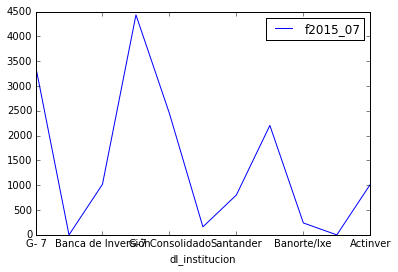

In [83]:
# Quiero graficarlo
# primero tenemos que hacer un par de cosas:
# 1. Cambiemos el índice:
nueva_instahorro.set_index(nueva_instahorro.dl_institucion, inplace=True)
# 2. Eliminemos las columnas que sobran:
cols = [u'f2015_07']
nueva_instahorro = nueva_instahorro[cols]
# LISTOS
nueva_instahorro.plot()

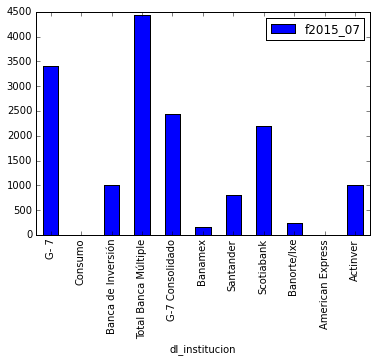

In [84]:
# miremos un gráfico de barras:
nueva_instahorro.plot(kind='bar')